In [11]:
import threading
import time

In [12]:
class point:
    def __init__(self, x=0, y=0):
        self.x = x;
        self.y = y;

In [13]:
class Vehicle:
    def __init__(self, vid = -1, capacity=0, pos=point(), telapsed=0, tour=[], countCharged=0,t=0):
        self.capacity = capacity
        self.pos = pos
        self.telapsed = telapsed
        self.tour = tour
        self.countCharged = countCharged
        self.vid = vid
        self.t = t

In [14]:
class Sensor:
    def __init__(self, pos=point(), capacity=0, RL=0, RC=0, vid = -1, t = 0):
        self.pos = pos
        self.capacity = capacity
        self.RL = RL
        self.RC = RC
        self.vid = vid
        self.t = t

In [15]:
consumerate_max = 10 # mj/s  (1-10)mj/s

import random

sensors = []
Sensors = []

In [17]:
f = open("/content/sample_data/input_directory/input1.txt",'r')
n= int(f.readline())
capacity=int(f.readline())
print(capacity)
RL = capacity / consumerate_max
RC = capacity

for i in range(1, n + 1):
    x,y = f.readline().split(" ")
    x = int(x)
    y = int(y)
    p = point(x, y)
    s = Sensor(point(x, y), capacity, RL, RC)
    s.RL = RL
    s.RC = RC

    Sensors.append(s)
    sensors.append(p)
f.close();

for i in range(1, n + 1):
    print("(", Sensors[i - 1].pos.x, ",", Sensors[i - 1].pos.y, ") ", Sensors[i - 1].RL, "   ", Sensors[i - 1].capacity,"  ",Sensors[i - 1].RC)

10800000
( 847 , 970 )  1080000.0     10800000    10800000
( 591 , 483 )  1080000.0     10800000    10800000
( 965 , 310 )  1080000.0     10800000    10800000
( 415 , 966 )  1080000.0     10800000    10800000
( 627 , 920 )  1080000.0     10800000    10800000
( 555 , 907 )  1080000.0     10800000    10800000
( 418 , 532 )  1080000.0     10800000    10800000
( 561 , 174 )  1080000.0     10800000    10800000
( 535 , 459 )  1080000.0     10800000    10800000
( 129 , 901 )  1080000.0     10800000    10800000
( 316 , 871 )  1080000.0     10800000    10800000
( 747 , 181 )  1080000.0     10800000    10800000
( 573 , 83 )  1080000.0     10800000    10800000
( 930 , 515 )  1080000.0     10800000    10800000
( 729 , 269 )  1080000.0     10800000    10800000
( 939 , 510 )  1080000.0     10800000    10800000
( 187 , 672 )  1080000.0     10800000    10800000
( 114 , 486 )  1080000.0     10800000    10800000
( 66 , 218 )  1080000.0     10800000    10800000
( 430 , 641 )  1080000.0     10800000    10

In [18]:
Vehicles = []
f = open("/content/sample_data/input_directory/vehicle.txt",'r')
n1 = int(f.readline())
print(n1)
for i in range(n1):
    x = int(f.readline());
    Vehicles.append(Vehicle(i, x))
    print(Vehicles[i].vid,"   ",Vehicles[i].capacity)
f.close()

12
0     1248582433
1     1126964728
2     4318006975
3     2244760851
4     1152624056
5     3847530941
6     1591827994
7     2138872920
8     1448990981
9     4581736512
10     3803152752
11     2356870178


In [19]:
import math
def Region(sensors, vehicles):
    h = len(vehicles)
    n = len(sensors)
    regionmean = []
    region = []
    newregionmean = []
    newregion = []

    i = 0
    for s in sensors:
        regionmean.append(s)
        region.append([i])
        newregionmean.append(s)
        newregion.append([i])
        i = i + 1

    k = n
    while (h < k):
        indi, indj = 0, 0
        for i in range(len(newregion)):
            x1 = newregionmean[i].x
            y1 = newregionmean[i].y
            min = 1e9
            for j in range(i + 1, len(newregion)):
                x2 = newregionmean[j].x
                y2 = newregionmean[j].y
                dx = int(x1 - x2)
                dy = int(y1 - y2)
                dist = dx * dx + dy * dy
                if (min > dist):
                    min = dist
                    indj = j
                    indi = i

        finalx = (newregionmean[indi].x + newregionmean[indj].x) / 2
        finaly = (newregionmean[indi].y + newregionmean[indj].y) / 2

        newregionmean.remove(newregionmean[indj])
        newregionmean[indi] = point(finalx, finaly)

        newregion[indi].extend(newregion[indj])

        newregion.remove(newregion[indj]);

        k = k - 1

    # #print cluster
    # for r in newregion:
    #   print("[",end="")
    #   for s in r:
    #     print(s,", ",end="")
    #   print("]")

    # # print mean of clusters
    # for mean in newregionmean:
    #   print("(",mean.x," ,",mean.y,"), ",end="")

    while (region != newregion):

        region = newregion
        newregion = []

        for m in newregionmean:
            newregion.append([])

        regionmean = newregionmean

        j = 0
        for s in sensors:

            min = 1e9
            ind = 0
            for i in range(len(newregionmean)):
                dx = newregionmean[i].x - s.x
                dy = newregionmean[i].y - s.y

                d = dx * dx + dy * dy
                if (d < min):
                    min = d
                    ind = i

            newregion[ind].append(j);
            j = j + 1;

        i = 0
        for r in newregion:
            dx = 0
            dy = 0
            l = 0
            for s in r:
                l = l + 1
                dx = dx + sensors[s].x
                dy = dy + sensors[s].y

            if (l != 0):
                newregionmean[i].x = dx / l
                newregionmean[i].y = dy / l

            i = i + 1

    for r in newregion:
        print("[", end="")
        for s in r:
            print(s, ", ", end="")
        print("]")

    print()
    for mean in newregionmean:
        print("(", mean.x, " ,", mean.y, "), ", end="")

    return [newregion, newregionmean]


In [20]:
regions = Region(sensors, Vehicles)

[0 , 27 , 40 , 67 , 83 , 92 , 94 , 133 , 157 , 158 , 162 , 172 , 181 , 186 , 199 , ]
[1 , 19 , 29 , 31 , 53 , 64 , 72 , 107 , 108 , 111 , 121 , 132 , 163 , 187 , 192 , ]
[2 , 13 , 15 , 23 , 35 , 37 , 62 , 73 , 74 , 93 , 118 , 123 , 137 , 150 , 168 , 182 , 196 , ]
[3 , 30 , 32 , 54 , 63 , 96 , 97 , 115 , 138 , 155 , 176 , 183 , 197 , ]
[4 , 25 , 77 , 98 , 142 , 146 , 160 , ]
[5 , 34 , 41 , 51 , 69 , 71 , 112 , 124 , 129 , 156 , 184 , ]
[6 , 17 , 36 , 38 , 39 , 42 , 43 , 44 , 61 , 84 , 85 , 105 , 106 , 126 , 127 , 134 , 139 , 144 , 149 , 152 , 153 , ]
[7 , 18 , 20 , 26 , 46 , 48 , 57 , 59 , 60 , 68 , 76 , 95 , 104 , 109 , 113 , 125 , 165 , 166 , 175 , 178 , 179 , 195 , ]
[8 , 22 , 45 , 47 , 50 , 55 , 70 , 78 , 88 , 99 , 128 , 145 , 148 , 154 , 164 , 170 , 173 , 185 , 188 , ]
[9 , 16 , 28 , 58 , 66 , 81 , 87 , 89 , 100 , 122 , 130 , 136 , 141 , 143 , 147 , 167 , 171 , 189 , ]
[10 , 75 , 82 , 91 , 103 , 110 , 116 , 159 , 169 , 180 , ]
[11 , 12 , 14 , 21 , 24 , 33 , 49 , 52 , 56 , 65 , 79 ,

In [21]:
# Algo 2
from operator import attrgetter
def AssignVehicle(regions, Sensors, vehicles, BS):
    h = len(vehicles)
    alpha = 0.5
    RE = []
    W = []
    for i in range(h):
        RE.append(0);
        for s in (regions[0])[i]:
            RE[i] = RE[i] + Sensors[i].capacity
        dx = BS.x - (regions[1])[i].x
        dy = BS.y - (regions[1])[i].y

        d = dx * dx + dy * dy

        w = (RE[i] + d) * alpha

        W.append([w, i])

    W.sort();

    vehicles.sort(key=attrgetter('capacity'))

    R = []
    print()
    for i in range(h):
        print(vehicles[i].vid," --> ",(W[i])[1]," === ",(regions[0])[(W[i])[1]])
        cluster = []
        for s in (regions[0])[(W[i])[1]]:
          Sensors[s].vid = vehicles[i].vid
        R.append([(W[i])[1], vehicles[i]])

    R.sort()
    # print(R)

    return R

In [22]:
cluster_vehicle = AssignVehicle(regions, Sensors, Vehicles, point(500, 500))


1  -->  4  ===  [4, 25, 77, 98, 142, 146, 160]
4  -->  10  ===  [10, 75, 82, 91, 103, 110, 116, 159, 169, 180]
0  -->  5  ===  [5, 34, 41, 51, 69, 71, 112, 124, 129, 156, 184]
8  -->  3  ===  [3, 30, 32, 54, 63, 96, 97, 115, 138, 155, 176, 183, 197]
6  -->  1  ===  [1, 19, 29, 31, 53, 64, 72, 107, 108, 111, 121, 132, 163, 187, 192]
7  -->  0  ===  [0, 27, 40, 67, 83, 92, 94, 133, 157, 158, 162, 172, 181, 186, 199]
3  -->  2  ===  [2, 13, 15, 23, 35, 37, 62, 73, 74, 93, 118, 123, 137, 150, 168, 182, 196]
11  -->  9  ===  [9, 16, 28, 58, 66, 81, 87, 89, 100, 122, 130, 136, 141, 143, 147, 167, 171, 189]
10  -->  8  ===  [8, 22, 45, 47, 50, 55, 70, 78, 88, 99, 128, 145, 148, 154, 164, 170, 173, 185, 188]
5  -->  6  ===  [6, 17, 36, 38, 39, 42, 43, 44, 61, 84, 85, 105, 106, 126, 127, 134, 139, 144, 149, 152, 153]
2  -->  7  ===  [7, 18, 20, 26, 46, 48, 57, 59, 60, 68, 76, 95, 104, 109, 113, 125, 165, 166, 175, 178, 179, 195]
9  -->  11  ===  [11, 12, 14, 21, 24, 33, 49, 52, 56, 65, 79, 80,

In [23]:
v = 5 # m/s
echargerate = 5000 # mj/s
emovrate = 600000 # mj/m

threadLock = threading.Lock()

In [24]:
def Routing(vehicle, sensors, BS, t, clusterNo):
  EM, EC, E = 0, 0, 0;
  vehicle.pos = BS
  tour = []
  tour.append(BS)
  vehicle.telapsed = 1
  countCharged = 0
  countDischarged = 0
  
  SQ=[]
  #making SQ at starting 
  
  

  # print(len(sensors))
  # print(len(SQ))
  print("1st request comes at  time = ", vehicle.t)
  while len(sensors)!=0:
    threadLock.acquire()
    #t.sleep(15)
    """print(vehicle.pos.x," , ",vehicle.pos.y)"""
    
    # making SQ
    while(len(SQ) == 0 and len(sensors) > 0) :
        for si in sensors :
            si.RC = max(0, (si.RC-random.randint(1,10) * vehicle.telapsed))
            si.RL = si.RC / consumerate_max
            vehicle.t = vehicle.t + vehicle.telapsed;
            si.t  = si.t + vehicle.telapsed;
            
            if (si.RC <= (si.capacity*0.4)):
                SQ.append(si)
        
        if(len(SQ) == 0):
            vehicle.telapsed = 1;
            
            
    
    min=9223372036854775807
    s = SQ[0]
    """print(vehicle.telapsed)"""
    for si in SQ:
      d=(vehicle.pos.x-si.pos.x)*(vehicle.pos.x-si.pos.x)-(vehicle.pos.y-si.pos.y)*(vehicle.pos.y-si.pos.y)
      
      if(min > d*si.RL):
        s = si
      


    d=math.sqrt((vehicle.pos.x-s.pos.x)*(vehicle.pos.x-s.pos.x)+(vehicle.pos.y-s.pos.y)*(vehicle.pos.y-s.pos.y)) 
    time = d/v
    d2= math.sqrt((BS.x-s.pos.x)*(BS.x-s.pos.x)+(BS.y-s.pos.y)*(BS.y-s.pos.y))

    consumerate = random.randint(1,10)
    tcharge = (s.capacity-s.RL*consumerate)/(echargerate - consumerate)
    """print("tcharge=",tcharge)"""
    Emov = ((d + d2)/v)*(emovrate)
    Echarge = (tcharge*echargerate);
    etotal = E + Emov + Echarge 
    """print(time <= s.RL,"  t=",time,",  RL",s.RL)
    print("battery=",vehicle.capacity-E)"""
    
    if(time <= s.RL and etotal <= vehicle.capacity ):
      """print("********")"""

      eReach = time*emovrate
      EM = EM + eReach
      EC = EC + Echarge
      E = EM + EC
      vehicle.pos = s.pos
      tour.append(s)
      vehicle.countCharged =vehicle.countCharged +1
      vehicle.telapsed = time + tcharge
      
      """print(len(SQ))"""
      countCharged = countCharged + 1
      
    else:
        countDischarged = countDischarged + 1
        sensors.remove(s)
    
    SQ.remove(s)
    
    
    threadLock.release()
    """print(len(SQ))"""
  vehicle.tour = tour
  print(len(vehicle.tour))
  print("cluster -", clusterNo, "  remaining = ", len(SQ), "  charged = ",countCharged, "  dead = ",countDischarged, "  TotalTime=", vehicle.t)
  print("Echarge/Etotal = ",EC/E)

    

In [25]:
def clusterAndVehicle(regions,cluster_vehicle, clusterNo):
    sensor =[]
    
    vehicle = (cluster_vehicle[clusterNo])[1]
    
    for i in (regions[0])[clusterNo]:
        """print(i)"""
        """Sensors[i].RL = 12"""
        si = Sensors[i];
        si.RC = max(0, (si.RC-random.randint(1,5) * (vehicle.t-si.t)))
        si.RL = si.RC / consumerate_max;
        si.t  = vehicle.t; 
        sensor.append(si)
        #print(si.RC,"   ",si.t)
    
    
    
    return vehicle,sensor

In [26]:
# class myThread (threading.Thread):
#    def __init__(self, threadID, name):
#       threading.Thread.__init__(self)
#       self.threadID = threadID
#       self.name = name
      
#    def run(self):
#       print ("Starting " + self.name, self.threadID)
#       vehicle, sensor = clusterAndVehicle(regions,cluster_vehicle, self.threadID);
#       Routing(vehicle, sensor, point(500,500), time, self.threadID);
#       print ("Exiting " + self.name, self.threadID)

In [27]:
# Create new threads
for i in range(0,n1):
  print("cluster-",i)
  vehicle, sensor = clusterAndVehicle(regions,cluster_vehicle, i);
  Routing(vehicle, sensor, point(500,500), time, i);
    

# print ("Exiting Main Thread")

cluster- 0
1st request comes at  time =  0
89
cluster - 0   remaining =  0   charged =  88   dead =  15   TotalTime= 17847761.774582572
Echarge/Etotal =  0.35925987318311314
cluster- 1
1st request comes at  time =  0
54
cluster - 1   remaining =  0   charged =  53   dead =  15   TotalTime= 17796444.601060797
Echarge/Etotal =  0.2900435893601509
cluster- 2
1st request comes at  time =  0
78
cluster - 2   remaining =  0   charged =  77   dead =  17   TotalTime= 20173924.038754404
Echarge/Etotal =  0.28886006465785624
cluster- 3
1st request comes at  time =  0
58
cluster - 3   remaining =  0   charged =  57   dead =  13   TotalTime= 15427965.29330422
Echarge/Etotal =  0.33055250312350787
cluster- 4
1st request comes at  time =  0
50
cluster - 4   remaining =  0   charged =  49   dead =  7   TotalTime= 8338224.671078431
Echarge/Etotal =  0.3740266795087564
cluster- 5
1st request comes at  time =  0
55
cluster - 5   remaining =  0   charged =  54   dead =  11   TotalTime= 13074227.889942152

In [28]:
# vehicle, sensor = clusterAndVehicle(regions,cluster_vehicle, 0);
# vehicle.vid
# vehicle.capacity

In [29]:
# for s in sensor:
#   print(s.vid," ",s.capacity," ",s.RL," ",s.RC," ",s.t,"  (",s.pos.x,",",s.pos.y,")")

In [30]:
import matplotlib.pyplot as plt

7   17847761.774582572
( 500 , 500 )  ( 771 , 884 )  ( 858 , 944 )  ( 977 , 837 )  ( 925 , 945 )  ( 846 , 771 )  ( 886 , 824 )  ( 771 , 884 )  ( 884 , 697 )  ( 803 , 778 )  ( 927 , 949 )  ( 803 , 990 )  ( 842 , 929 )  ( 847 , 970 )  ( 798 , 936 )  ( 858 , 944 )  ( 977 , 837 )  ( 925 , 945 )  ( 846 , 771 )  ( 886 , 824 )  ( 771 , 884 )  ( 884 , 697 )  ( 803 , 778 )  ( 927 , 949 )  ( 803 , 990 )  ( 842 , 929 )  ( 847 , 970 )  ( 798 , 936 )  ( 898 , 985 )  ( 858 , 944 )  ( 977 , 837 )  ( 832 , 859 )  ( 925 , 945 )  ( 846 , 771 )  ( 886 , 824 )  ( 771 , 884 )  ( 884 , 697 )  ( 803 , 778 )  ( 927 , 949 )  ( 803 , 990 )  ( 842 , 929 )  ( 847 , 970 )  ( 798 , 936 )  ( 898 , 985 )  ( 858 , 944 )  ( 977 , 837 )  ( 832 , 859 )  ( 925 , 945 )  ( 846 , 771 )  ( 886 , 824 )  ( 771 , 884 )  ( 884 , 697 )  ( 803 , 778 )  ( 927 , 949 )  ( 803 , 990 )  ( 842 , 929 )  ( 847 , 970 )  ( 798 , 936 )  ( 898 , 985 )  ( 858 , 944 )  ( 977 , 837 )  ( 832 , 859 )  ( 925 , 945 )  ( 846 , 771 )  ( 886 , 824 )  ( 

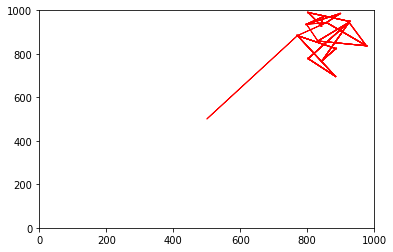

In [31]:
# Vehicles = []

#cluster- 0

vehicle = (cluster_vehicle[0])[1]

print(vehicle.vid," ", vehicle.t)

tour = vehicle.tour
# print(tour)

prevx = tour[0].x
prevy = tour[0].y

n = len(tour)
# print(n)
plt.xlim(0,1000)
plt.ylim(0,1000)
print("(",prevx,",",prevy,")",end="  ")
for i in range(1,n):
  # print(i)
  plt.arrow(prevx, prevy, tour[i].pos.x-prevx, tour[i].pos.y- prevy, head_width=3, head_length=3, color='red')

  prevx = tour[i].pos.x
  prevy = tour[i].pos.y
  print("(",prevx,",",prevy,")",end="  ")
plt.show()




6   17796444.601060797
( 500 , 500 )  ( 749 , 518 )  ( 692 , 650 )  ( 625 , 564 )  ( 719 , 676 )  ( 421 , 554 )  ( 710 , 668 )  ( 641 , 510 )  ( 749 , 518 )  ( 543 , 677 )  ( 407 , 555 )  ( 597 , 597 )  ( 548 , 520 )  ( 546 , 642 )  ( 540 , 614 )  ( 430 , 641 )  ( 591 , 483 )  ( 692 , 650 )  ( 625 , 564 )  ( 719 , 676 )  ( 421 , 554 )  ( 710 , 668 )  ( 641 , 510 )  ( 749 , 518 )  ( 543 , 677 )  ( 407 , 555 )  ( 597 , 597 )  ( 548 , 520 )  ( 546 , 642 )  ( 540 , 614 )  ( 430 , 641 )  ( 591 , 483 )  ( 692 , 650 )  ( 625 , 564 )  ( 719 , 676 )  ( 421 , 554 )  ( 710 , 668 )  ( 641 , 510 )  ( 749 , 518 )  ( 543 , 677 )  ( 407 , 555 )  ( 597 , 597 )  ( 548 , 520 )  ( 546 , 642 )  ( 540 , 614 )  ( 430 , 641 )  ( 591 , 483 )  ( 692 , 650 )  ( 625 , 564 )  ( 719 , 676 )  ( 421 , 554 )  ( 710 , 668 )  ( 641 , 510 )  ( 597 , 597 )  

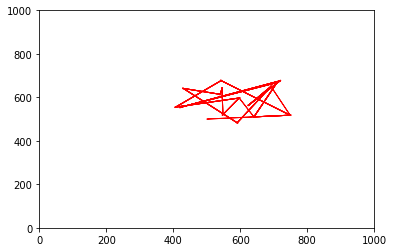

In [32]:
#cluster- 0

vehicle = (cluster_vehicle[1])[1]

print(vehicle.vid," ", vehicle.t)

tour = vehicle.tour
# print(tour)

prevx = tour[0].x
prevy = tour[0].y

n = len(tour)
# print(n)
plt.xlim(0,1000)
plt.ylim(0,1000)
print("(",prevx,",",prevy,")",end="  ")
for i in range(1,n):
  # print(i)
  plt.arrow(prevx, prevy, tour[i].pos.x-prevx, tour[i].pos.y- prevy, head_width=3, head_length=3, color='red')

  prevx = tour[i].pos.x
  prevy = tour[i].pos.y
  print("(",prevx,",",prevy,")",end="  ")
plt.show()

3   20173924.038754404
( 500 , 500 )  ( 981 , 566 )  ( 977 , 259 )  ( 990 , 437 )  ( 871 , 409 )  ( 991 , 455 )  ( 946 , 413 )  ( 961 , 564 )  ( 984 , 226 )  ( 992 , 528 )  ( 981 , 566 )  ( 843 , 598 )  ( 990 , 612 )  ( 836 , 329 )  ( 955 , 319 )  ( 939 , 510 )  ( 977 , 259 )  ( 990 , 437 )  ( 871 , 409 )  ( 991 , 455 )  ( 946 , 413 )  ( 961 , 564 )  ( 984 , 226 )  ( 992 , 528 )  ( 981 , 566 )  ( 921 , 301 )  ( 843 , 598 )  ( 990 , 612 )  ( 836 , 329 )  ( 955 , 319 )  ( 939 , 510 )  ( 930 , 515 )  ( 965 , 310 )  ( 977 , 259 )  ( 990 , 437 )  ( 871 , 409 )  ( 991 , 455 )  ( 946 , 413 )  ( 961 , 564 )  ( 984 , 226 )  ( 992 , 528 )  ( 981 , 566 )  ( 921 , 301 )  ( 843 , 598 )  ( 990 , 612 )  ( 836 , 329 )  ( 955 , 319 )  ( 939 , 510 )  ( 930 , 515 )  ( 965 , 310 )  ( 977 , 259 )  ( 990 , 437 )  ( 871 , 409 )  ( 991 , 455 )  ( 946 , 413 )  ( 961 , 564 )  ( 984 , 226 )  ( 992 , 528 )  ( 981 , 566 )  ( 921 , 301 )  ( 843 , 598 )  ( 990 , 612 )  ( 836 , 329 )  ( 955 , 319 )  ( 939 , 510 )  ( 

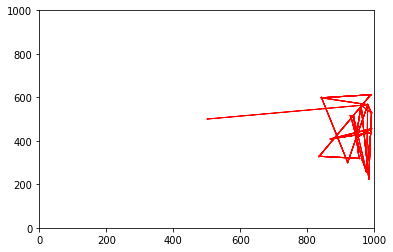

In [33]:
#cluster- 0

vehicle = (cluster_vehicle[2])[1]

print(vehicle.vid," ", vehicle.t)

tour = vehicle.tour
# print(tour)

prevx = tour[0].x
prevy = tour[0].y

n = len(tour)
# print(n)
plt.xlim(0,1000)
plt.ylim(0,1000)
print("(",prevx,",",prevy,")",end="  ")
for i in range(1,n):
  # print(i)
  plt.arrow(prevx, prevy, tour[i].pos.x-prevx, tour[i].pos.y- prevy, head_width=3, head_length=3, color='red')

  prevx = tour[i].pos.x
  prevy = tour[i].pos.y
  print("(",prevx,",",prevy,")",end="  ")
plt.show()

8   15427965.29330422
( 500 , 500 )  ( 340 , 998 )  ( 329 , 847 )  ( 327 , 891 )  ( 261 , 968 )  ( 329 , 733 )  ( 340 , 998 )  ( 334 , 883 )  ( 414 , 973 )  ( 397 , 905 )  ( 415 , 966 )  ( 329 , 847 )  ( 327 , 891 )  ( 261 , 968 )  ( 329 , 733 )  ( 340 , 998 )  ( 346 , 760 )  ( 334 , 883 )  ( 313 , 853 )  ( 414 , 973 )  ( 282 , 906 )  ( 397 , 905 )  ( 415 , 966 )  ( 329 , 847 )  ( 327 , 891 )  ( 254 , 932 )  ( 261 , 968 )  ( 329 , 733 )  ( 340 , 998 )  ( 346 , 760 )  ( 334 , 883 )  ( 313 , 853 )  ( 414 , 973 )  ( 282 , 906 )  ( 397 , 905 )  ( 415 , 966 )  ( 329 , 847 )  ( 327 , 891 )  ( 254 , 932 )  ( 261 , 968 )  ( 329 , 733 )  ( 340 , 998 )  ( 346 , 760 )  ( 334 , 883 )  ( 313 , 853 )  ( 414 , 973 )  ( 282 , 906 )  ( 397 , 905 )  ( 415 , 966 )  ( 329 , 847 )  ( 327 , 891 )  ( 254 , 932 )  ( 261 , 968 )  ( 329 , 733 )  ( 340 , 998 )  ( 346 , 760 )  ( 329 , 733 )  ( 329 , 733 )  

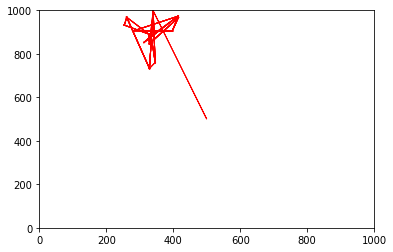

In [34]:
#cluster- 0

vehicle = (cluster_vehicle[3])[1]

print(vehicle.vid," ", vehicle.t)

tour = vehicle.tour
# print(tour)

prevx = tour[0].x
prevy = tour[0].y

n = len(tour)
# print(n)
plt.xlim(0,1000)
plt.ylim(0,1000)
print("(",prevx,",",prevy,")",end="  ")
for i in range(1,n):
  # print(i)
  plt.arrow(prevx, prevy, tour[i].pos.x-prevx, tour[i].pos.y- prevy, head_width=3, head_length=3, color='red')

  prevx = tour[i].pos.x
  prevy = tour[i].pos.y
  print("(",prevx,",",prevy,")",end="  ")
plt.show()

1   8338224.671078431
( 500 , 500 )  ( 627 , 920 )  ( 733 , 790 )  ( 648 , 824 )  ( 629 , 961 )  ( 613 , 924 )  ( 588 , 869 )  ( 627 , 920 )  ( 733 , 790 )  ( 578 , 907 )  ( 648 , 824 )  ( 629 , 961 )  ( 613 , 924 )  ( 588 , 869 )  ( 627 , 920 )  ( 733 , 790 )  ( 578 , 907 )  ( 648 , 824 )  ( 629 , 961 )  ( 613 , 924 )  ( 588 , 869 )  ( 627 , 920 )  ( 733 , 790 )  ( 578 , 907 )  ( 648 , 824 )  ( 629 , 961 )  ( 613 , 924 )  ( 588 , 869 )  ( 627 , 920 )  ( 733 , 790 )  ( 578 , 907 )  ( 648 , 824 )  ( 629 , 961 )  ( 613 , 924 )  ( 588 , 869 )  ( 627 , 920 )  ( 733 , 790 )  ( 578 , 907 )  ( 648 , 824 )  ( 629 , 961 )  ( 613 , 924 )  ( 588 , 869 )  ( 627 , 920 )  ( 733 , 790 )  ( 578 , 907 )  ( 648 , 824 )  ( 629 , 961 )  ( 613 , 924 )  ( 588 , 869 )  ( 578 , 907 )  

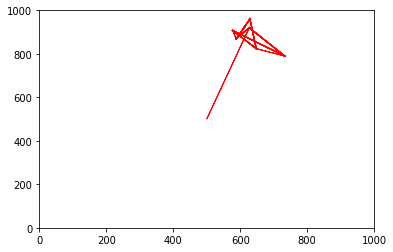

In [35]:
#cluster- 0

vehicle = (cluster_vehicle[4])[1]

print(vehicle.vid," ", vehicle.t)

tour = vehicle.tour
# print(tour)

prevx = tour[0].x
prevy = tour[0].y

n = len(tour)
# print(n)
plt.xlim(0,1000)
plt.ylim(0,1000)
print("(",prevx,",",prevy,")",end="  ")
for i in range(1,n):
  # print(i)
  plt.arrow(prevx, prevy, tour[i].pos.x-prevx, tour[i].pos.y- prevy, head_width=3, head_length=3, color='red')

  prevx = tour[i].pos.x
  prevy = tour[i].pos.y
  print("(",prevx,",",prevy,")",end="  ")
plt.show()

0   13074227.889942152
( 500 , 500 )  ( 476 , 771 )  ( 429 , 842 )  ( 476 , 771 )  ( 476 , 907 )  ( 555 , 907 )  ( 418 , 796 )  ( 507 , 882 )  ( 558 , 773 )  ( 429 , 842 )  ( 510 , 950 )  ( 476 , 771 )  ( 510 , 734 )  ( 476 , 907 )  ( 555 , 907 )  ( 418 , 796 )  ( 507 , 882 )  ( 558 , 773 )  ( 429 , 842 )  ( 487 , 845 )  ( 510 , 950 )  ( 476 , 771 )  ( 510 , 734 )  ( 516 , 888 )  ( 476 , 907 )  ( 555 , 907 )  ( 418 , 796 )  ( 507 , 882 )  ( 558 , 773 )  ( 429 , 842 )  ( 487 , 845 )  ( 510 , 950 )  ( 476 , 771 )  ( 510 , 734 )  ( 516 , 888 )  ( 476 , 907 )  ( 555 , 907 )  ( 418 , 796 )  ( 507 , 882 )  ( 558 , 773 )  ( 429 , 842 )  ( 487 , 845 )  ( 510 , 950 )  ( 476 , 771 )  ( 510 , 734 )  ( 516 , 888 )  ( 476 , 907 )  ( 555 , 907 )  ( 418 , 796 )  ( 507 , 882 )  ( 558 , 773 )  ( 429 , 842 )  ( 487 , 845 )  ( 476 , 771 )  ( 510 , 734 )  

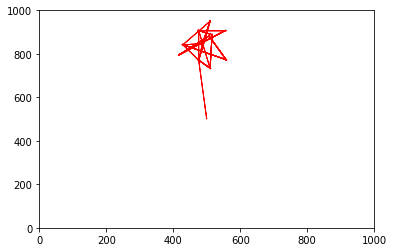

In [36]:
#cluster- 0

vehicle = (cluster_vehicle[5])[1]

print(vehicle.vid," ", vehicle.t)

tour = vehicle.tour
# print(tour)

prevx = tour[0].x
prevy = tour[0].y

n = len(tour)
# print(n)
plt.xlim(0,1000)
plt.ylim(0,1000)
print("(",prevx,",",prevy,")",end="  ")
for i in range(1,n):
  # print(i)
  plt.arrow(prevx, prevy, tour[i].pos.x-prevx, tour[i].pos.y- prevy, head_width=3, head_length=3, color='red')

  prevx = tour[i].pos.x
  prevy = tour[i].pos.y
  print("(",prevx,",",prevy,")",end="  ")
plt.show()

5   25049551.019060574
( 500 , 500 )  ( 106 , 485 )  ( 150 , 325 )  ( 106 , 485 )  ( 219 , 311 )  ( 196 , 444 )  ( 49 , 381 )  ( 115 , 484 )  ( 186 , 336 )  ( 51 , 400 )  ( 200 , 387 )  ( 272 , 356 )  ( 235 , 351 )  ( 224 , 272 )  ( 114 , 486 )  ( 418 , 532 )  ( 150 , 325 )  ( 106 , 485 )  ( 154 , 295 )  ( 219 , 311 )  ( 196 , 444 )  ( 49 , 381 )  ( 8 , 378 )  ( 229 , 449 )  ( 115 , 484 )  ( 186 , 336 )  ( 51 , 400 )  ( 33 , 375 )  ( 161 , 303 )  ( 200 , 387 )  ( 272 , 356 )  ( 235 , 351 )  ( 224 , 272 )  ( 141 , 361 )  ( 114 , 486 )  ( 418 , 532 )  ( 150 , 325 )  ( 293 , 341 )  ( 106 , 485 )  ( 154 , 295 )  ( 219 , 311 )  ( 196 , 444 )  ( 49 , 381 )  ( 8 , 378 )  ( 229 , 449 )  ( 115 , 484 )  ( 186 , 336 )  ( 51 , 400 )  ( 33 , 375 )  ( 161 , 303 )  ( 200 , 387 )  ( 272 , 356 )  ( 235 , 351 )  ( 224 , 272 )  ( 141 , 361 )  ( 114 , 486 )  ( 418 , 532 )  ( 150 , 325 )  ( 293 , 341 )  ( 106 , 485 )  ( 154 , 295 )  ( 219 , 311 )  ( 196 , 444 )  ( 49 , 381 )  ( 8 , 378 )  ( 229 , 449 )  ( 

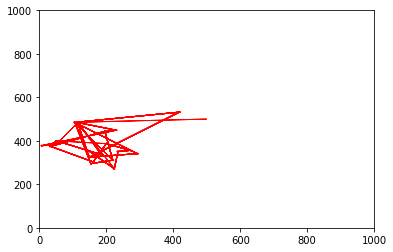

In [37]:
#cluster- 0

vehicle = (cluster_vehicle[6])[1]

print(vehicle.vid," ", vehicle.t)

tour = vehicle.tour
# print(tour)

prevx = tour[0].x
prevy = tour[0].y

n = len(tour)
# print(n)
plt.xlim(0,1000)
plt.ylim(0,1000)
print("(",prevx,",",prevy,")",end="  ")
for i in range(1,n):
  # print(i)
  plt.arrow(prevx, prevy, tour[i].pos.x-prevx, tour[i].pos.y- prevy, head_width=3, head_length=3, color='red')

  prevx = tour[i].pos.x
  prevy = tour[i].pos.y
  print("(",prevx,",",prevy,")",end="  ")
plt.show()

2   26197616.97482261
( 500 , 500 )  ( 306 , 175 )  ( 306 , 175 )  ( 109 , 59 )  ( 144 , 106 )  ( 321 , 125 )  ( 175 , 241 )  ( 304 , 254 )  ( 209 , 172 )  ( 16 , 118 )  ( 46 , 82 )  ( 392 , 67 )  ( 459 , 6 )  ( 291 , 221 )  ( 29 , 29 )  ( 431 , 10 )  ( 66 , 218 )  ( 306 , 175 )  ( 109 , 59 )  ( 154 , 143 )  ( 144 , 106 )  ( 321 , 125 )  ( 179 , 240 )  ( 175 , 241 )  ( 304 , 254 )  ( 308 , 43 )  ( 156 , 172 )  ( 209 , 172 )  ( 16 , 118 )  ( 46 , 82 )  ( 392 , 67 )  ( 459 , 6 )  ( 60 , 137 )  ( 291 , 221 )  ( 29 , 29 )  ( 431 , 10 )  ( 66 , 218 )  ( 561 , 174 )  ( 306 , 175 )  ( 109 , 59 )  ( 154 , 143 )  ( 144 , 106 )  ( 321 , 125 )  ( 179 , 240 )  ( 175 , 241 )  ( 304 , 254 )  ( 308 , 43 )  ( 156 , 172 )  ( 209 , 172 )  ( 16 , 118 )  ( 46 , 82 )  ( 392 , 67 )  ( 459 , 6 )  ( 60 , 137 )  ( 150 , 153 )  ( 291 , 221 )  ( 29 , 29 )  ( 431 , 10 )  ( 66 , 218 )  ( 561 , 174 )  ( 306 , 175 )  ( 109 , 59 )  ( 154 , 143 )  ( 144 , 106 )  ( 321 , 125 )  ( 179 , 240 )  ( 175 , 241 )  ( 304 , 254

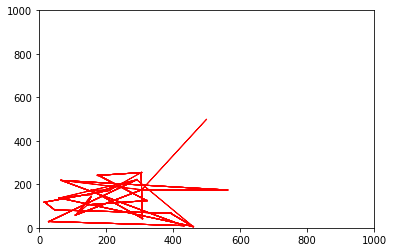

In [38]:
#cluster- 0

vehicle = (cluster_vehicle[7])[1]

print(vehicle.vid," ", vehicle.t)

tour = vehicle.tour
# print(tour)

prevx = tour[0].x
prevy = tour[0].y

n = len(tour)
# print(n)
plt.xlim(0,1000)
plt.ylim(0,1000)
print("(",prevx,",",prevy,")",end="  ")
for i in range(1,n):
  # print(i)
  plt.arrow(prevx, prevy, tour[i].pos.x-prevx, tour[i].pos.y- prevy, head_width=3, head_length=3, color='red')

  prevx = tour[i].pos.x
  prevy = tour[i].pos.y
  print("(",prevx,",",prevy,")",end="  ")
plt.show()

10   22656701.15162535
( 500 , 500 )  ( 617 , 319 )  ( 454 , 95 )  ( 550 , 235 )  ( 465 , 285 )  ( 422 , 308 )  ( 617 , 319 )  ( 384 , 341 )  ( 428 , 482 )  ( 375 , 397 )  ( 535 , 459 )  ( 562 , 346 )  ( 437 , 293 )  ( 347 , 301 )  ( 454 , 95 )  ( 386 , 501 )  ( 434 , 202 )  ( 525 , 385 )  ( 513 , 234 )  ( 550 , 235 )  ( 465 , 285 )  ( 422 , 308 )  ( 617 , 319 )  ( 384 , 341 )  ( 428 , 482 )  ( 375 , 397 )  ( 426 , 337 )  ( 535 , 459 )  ( 562 , 346 )  ( 466 , 314 )  ( 437 , 293 )  ( 347 , 301 )  ( 454 , 95 )  ( 386 , 501 )  ( 434 , 202 )  ( 525 , 385 )  ( 513 , 234 )  ( 550 , 235 )  ( 501 , 279 )  ( 465 , 285 )  ( 422 , 308 )  ( 617 , 319 )  ( 384 , 341 )  ( 428 , 482 )  ( 375 , 397 )  ( 426 , 337 )  ( 535 , 459 )  ( 562 , 346 )  ( 466 , 314 )  ( 437 , 293 )  ( 347 , 301 )  ( 454 , 95 )  ( 386 , 501 )  ( 434 , 202 )  ( 525 , 385 )  ( 513 , 234 )  ( 550 , 235 )  ( 501 , 279 )  ( 465 , 285 )  ( 422 , 308 )  ( 617 , 319 )  ( 384 , 341 )  ( 428 , 482 )  ( 375 , 397 )  ( 426 , 337 )  ( 535 

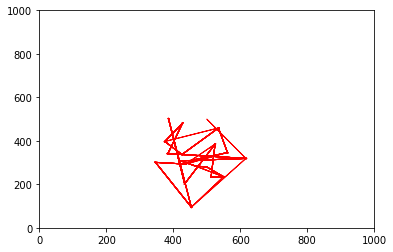

In [39]:
#cluster- 0

vehicle = (cluster_vehicle[8])[1]

print(vehicle.vid," ", vehicle.t)

tour = vehicle.tour
# print(tour)

prevx = tour[0].x
prevy = tour[0].y

n = len(tour)
# print(n)
plt.xlim(0,1000)
plt.ylim(0,1000)
print("(",prevx,",",prevy,")",end="  ")
for i in range(1,n):
  # print(i)
  plt.arrow(prevx, prevy, tour[i].pos.x-prevx, tour[i].pos.y- prevy, head_width=3, head_length=3, color='red')

  prevx = tour[i].pos.x
  prevy = tour[i].pos.y
  print("(",prevx,",",prevy,")",end="  ")
plt.show()

11   21388272.84642543
( 500 , 500 )  ( 10 , 504 )  ( 43 , 585 )  ( 42 , 734 )  ( 157 , 630 )  ( 10 , 504 )  ( 72 , 526 )  ( 237 , 531 )  ( 59 , 573 )  ( 52 , 681 )  ( 272 , 547 )  ( 286 , 613 )  ( 231 , 633 )  ( 287 , 655 )  ( 187 , 672 )  ( 80 , 610 )  ( 43 , 585 )  ( 18 , 563 )  ( 42 , 734 )  ( 68 , 581 )  ( 157 , 630 )  ( 10 , 504 )  ( 72 , 526 )  ( 237 , 531 )  ( 59 , 573 )  ( 52 , 681 )  ( 272 , 547 )  ( 286 , 613 )  ( 231 , 633 )  ( 122 , 645 )  ( 287 , 655 )  ( 187 , 672 )  ( 80 , 610 )  ( 43 , 585 )  ( 18 , 563 )  ( 42 , 734 )  ( 68 , 581 )  ( 157 , 630 )  ( 10 , 504 )  ( 72 , 526 )  ( 237 , 531 )  ( 59 , 573 )  ( 52 , 681 )  ( 272 , 547 )  ( 286 , 613 )  ( 231 , 633 )  ( 122 , 645 )  ( 287 , 655 )  ( 187 , 672 )  ( 80 , 610 )  ( 43 , 585 )  ( 18 , 563 )  ( 42 , 734 )  ( 68 , 581 )  ( 157 , 630 )  ( 10 , 504 )  ( 72 , 526 )  ( 237 , 531 )  ( 59 , 573 )  ( 52 , 681 )  ( 272 , 547 )  ( 286 , 613 )  ( 231 , 633 )  ( 122 , 645 )  ( 287 , 655 )  ( 187 , 672 )  ( 129 , 901 )  ( 80 ,

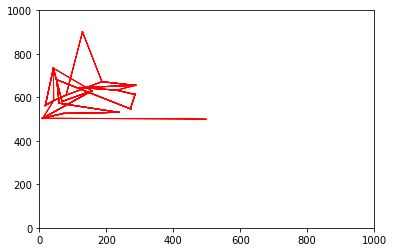

In [40]:
#cluster- 0

vehicle = (cluster_vehicle[9])[1]

print(vehicle.vid," ", vehicle.t)

tour = vehicle.tour
# print(tour)

prevx = tour[0].x
prevy = tour[0].y

n = len(tour)
# print(n)
plt.xlim(0,1000)
plt.ylim(0,1000)
print("(",prevx,",",prevy,")",end="  ")
for i in range(1,n):
  # print(i)
  plt.arrow(prevx, prevy, tour[i].pos.x-prevx, tour[i].pos.y- prevy, head_width=3, head_length=3, color='red')

  prevx = tour[i].pos.x
  prevy = tour[i].pos.y
  print("(",prevx,",",prevy,")",end="  ")
plt.show()

4   11871577.306303252
( 500 , 500 )  ( 50 , 877 )  ( 138 , 923 )  ( 50 , 877 )  ( 238 , 758 )  ( 207 , 795 )  ( 94 , 928 )  ( 171 , 879 )  ( 316 , 871 )  ( 138 , 923 )  ( 84 , 903 )  ( 50 , 877 )  ( 238 , 758 )  ( 221 , 832 )  ( 207 , 795 )  ( 94 , 928 )  ( 171 , 879 )  ( 162 , 858 )  ( 316 , 871 )  ( 138 , 923 )  ( 84 , 903 )  ( 50 , 877 )  ( 238 , 758 )  ( 221 , 832 )  ( 207 , 795 )  ( 94 , 928 )  ( 171 , 879 )  ( 162 , 858 )  ( 316 , 871 )  ( 138 , 923 )  ( 84 , 903 )  ( 50 , 877 )  ( 238 , 758 )  ( 221 , 832 )  ( 207 , 795 )  ( 94 , 928 )  ( 171 , 879 )  ( 162 , 858 )  ( 316 , 871 )  ( 138 , 923 )  ( 84 , 903 )  ( 50 , 877 )  ( 238 , 758 )  ( 221 , 832 )  ( 207 , 795 )  ( 94 , 928 )  ( 171 , 879 )  ( 162 , 858 )  ( 316 , 871 )  

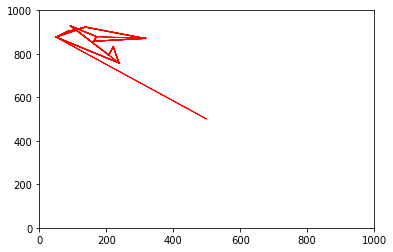

In [41]:
#cluster- 0

vehicle = (cluster_vehicle[10])[1]

print(vehicle.vid," ", vehicle.t)

tour = vehicle.tour
# print(tour)

prevx = tour[0].x
prevy = tour[0].y

n = len(tour)
# print(n)
plt.xlim(0,1000)
plt.ylim(0,1000)
print("(",prevx,",",prevy,")",end="  ")
for i in range(1,n):
  # print(i)
  plt.arrow(prevx, prevy, tour[i].pos.x-prevx, tour[i].pos.y- prevy, head_width=3, head_length=3, color='red')

  prevx = tour[i].pos.x
  prevy = tour[i].pos.y
  print("(",prevx,",",prevy,")",end="  ")
plt.show()

9   37956054.25663628
( 500 , 500 )  ( 807 , 109 )  ( 681 , 200 )  ( 945 , 141 )  ( 713 , 35 )  ( 640 , 28 )  ( 635 , 128 )  ( 661 , 124 )  ( 822 , 232 )  ( 821 , 9 )  ( 718 , 167 )  ( 807 , 109 )  ( 793 , 314 )  ( 932 , 107 )  ( 754 , 235 )  ( 848 , 62 )  ( 714 , 64 )  ( 806 , 202 )  ( 729 , 269 )  ( 776 , 319 )  ( 681 , 200 )  ( 702 , 295 )  ( 945 , 141 )  ( 713 , 35 )  ( 830 , 189 )  ( 640 , 28 )  ( 635 , 128 )  ( 568 , 144 )  ( 653 , 47 )  ( 661 , 124 )  ( 822 , 232 )  ( 619 , 149 )  ( 821 , 9 )  ( 718 , 167 )  ( 915 , 82 )  ( 807 , 109 )  ( 793 , 314 )  ( 932 , 107 )  ( 704 , 140 )  ( 754 , 235 )  ( 848 , 62 )  ( 714 , 64 )  ( 756 , 176 )  ( 806 , 202 )  ( 729 , 269 )  ( 573 , 83 )  ( 747 , 181 )  ( 776 , 319 )  ( 803 , 34 )  ( 681 , 200 )  ( 702 , 295 )  ( 945 , 141 )  ( 713 , 35 )  ( 830 , 189 )  ( 640 , 28 )  ( 635 , 128 )  ( 568 , 144 )  ( 653 , 47 )  ( 536 , 77 )  ( 661 , 124 )  ( 822 , 232 )  ( 619 , 149 )  ( 821 , 9 )  ( 718 , 167 )  ( 915 , 82 )  ( 592 , 176 )  ( 807 , 109

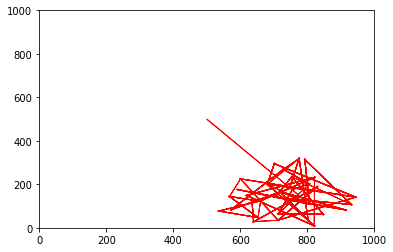

In [42]:
#cluster- 0

vehicle = (cluster_vehicle[11])[1]

print(vehicle.vid," ", vehicle.t)

tour = vehicle.tour
# print(tour)

prevx = tour[0].x
prevy = tour[0].y

n = len(tour)
# print(n)
plt.xlim(0,1000)
plt.ylim(0,1000)
print("(",prevx,",",prevy,")",end="  ")
for i in range(1,n):
  # print(i)
  plt.arrow(prevx, prevy, tour[i].pos.x-prevx, tour[i].pos.y- prevy, head_width=3, head_length=3, color='red')

  prevx = tour[i].pos.x
  prevy = tour[i].pos.y
  print("(",prevx,",",prevy,")",end="  ")
plt.show()